In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Summarization

In [2]:
world_df= pd.read_csv('covid19_countrywide.csv')
age_df= pd.read_csv('population_structure_by_age.csv')

In [3]:
world_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [4]:
age_df.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [5]:
#merge bothe the datasets based on country.
df = pd.merge(world_df,age_df,on='Country')

In [6]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


In [8]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03,5456.000000,5456.000000,5456.000000
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03,0.276098,0.636109,0.087731
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04,0.106454,0.066359,0.062350
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01,0.177000,0.596750,0.034000
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02,0.266500,0.649000,0.063500
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03,0.368250,0.675250,0.143250
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000


    1. Mean < Median. Hence we have left skewed data.
    2. In a month, between April and May 2020, there has been maximum of 91k deaths and 18k people were in critical stage.
    3. Outliers are definitel present because of huge gap between 75% and max values.

# Data Visualization and Manipulation

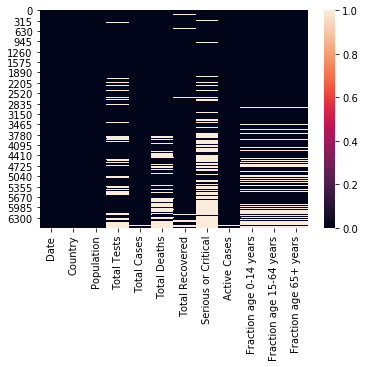

In [9]:
sns.heatmap(df.isnull())

In [10]:
print("Count of Null values :")
df.isnull().sum()

Count of Null values :


Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [11]:
df[df['Total Cases'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
2635,2020-04-18,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2636,2020-04-19,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2637,2020-04-20,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2638,2020-04-21,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2639,2020-04-22,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2640,2020-04-23,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2641,2020-04-24,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2642,2020-04-25,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2643,2020-04-26,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035
2644,2020-04-27,Tajikistan,9510530,NaN,NaN,NaN,NaN,NaN,NaN,0.353,0.613,0.035


In [12]:
null_cases = df[df['Total Cases'].isnull()]
df.drop(null_cases.index,axis=0,inplace=True)

In [13]:
df[df['Active Cases'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
150,2020-05-14,UK,67844241,2219281.0,233151.0,33614.0,NaN,1559.0,NaN,0.177,0.638,0.185
151,2020-05-15,UK,67844241,2353078.0,236711.0,33998.0,NaN,1559.0,NaN,0.177,0.638,0.185
152,2020-05-16,UK,67844241,2489563.0,240161.0,34466.0,NaN,1559.0,NaN,0.177,0.638,0.185
153,2020-05-17,UK,67844241,2580769.0,243695.0,34636.0,NaN,1559.0,NaN,0.177,0.638,0.185
154,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN,0.177,0.638,0.185
584,2020-05-14,Netherlands,17130492,282776.0,43481.0,5590.0,NaN,410.0,NaN,0.164,0.648,0.188
585,2020-05-15,Netherlands,17130492,287943.0,43681.0,5643.0,NaN,378.0,NaN,0.164,0.648,0.188
586,2020-05-16,Netherlands,17130492,287943.0,43870.0,5670.0,NaN,346.0,NaN,0.164,0.648,0.188
587,2020-05-17,Netherlands,17130492,287943.0,43995.0,5680.0,NaN,349.0,NaN,0.164,0.648,0.188
588,2020-05-18,Netherlands,17130492,297347.0,44141.0,5694.0,NaN,323.0,NaN,0.164,0.648,0.188


In [14]:
df['Active Cases'].replace(np.NaN, 0, inplace=True)

In [15]:
#To find the true death rate, we need the total number of deaths due to covid.
df[df['Total Recovered'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
124,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,0.177,0.638,0.185
125,2020-04-19,UK,67844241,482063.0,120067.0,16060.0,NaN,1559.0,103663.0,0.177,0.638,0.185
126,2020-04-20,UK,67844241,501379.0,124743.0,16509.0,NaN,1559.0,107890.0,0.177,0.638,0.185
127,2020-04-21,UK,67844241,535342.0,129044.0,17337.0,NaN,1559.0,111363.0,0.177,0.638,0.185
128,2020-04-22,UK,67844241,559935.0,133495.0,18100.0,NaN,1559.0,115051.0,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...
6590,2020-05-06,Saint Pierre Miquelon,5797,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6591,2020-05-07,Saint Pierre Miquelon,5797,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6592,2020-05-08,Saint Pierre Miquelon,5797,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6593,2020-05-09,Saint Pierre Miquelon,5797,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [16]:
df['Total Recovered'].replace(np.NaN,0,inplace=True)

In [17]:
df[df['Serious or Critical'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
310,2020-04-18,India,1378381772,335123.0,16365.0,521.0,2463.0,NaN,13381.0,0.278,0.662,0.06
311,2020-04-19,India,1378381772,401586.0,17615.0,559.0,2854.0,NaN,14202.0,0.278,0.662,0.06
312,2020-04-20,India,1378381772,401586.0,18539.0,592.0,3273.0,NaN,14674.0,0.278,0.662,0.06
313,2020-04-21,India,1378381772,447812.0,20080.0,645.0,3975.0,NaN,15460.0,0.278,0.662,0.06
314,2020-04-22,India,1378381772,462621.0,21370.0,681.0,4370.0,NaN,16319.0,0.278,0.662,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-15,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-16,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-17,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [18]:
df['Serious or Critical'].replace(np.NaN, 0, inplace=True)

In [19]:
df['Total Deaths'].replace(np.NaN, 0, inplace=True)

In [20]:
df[df['Fraction age 0-14 years'].isnull()]

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
2945,2020-04-18,Mayotte,271976,1800.0,254.0,4.0,117.0,6.0,133.0,NaN,NaN,NaN
2946,2020-04-19,Mayotte,271976,1850.0,271.0,4.0,117.0,5.0,150.0,NaN,NaN,NaN
2947,2020-04-20,Mayotte,271976,1850.0,271.0,4.0,117.0,5.0,150.0,NaN,NaN,NaN
2948,2020-04-21,Mayotte,271976,2000.0,311.0,4.0,117.0,4.0,190.0,NaN,NaN,NaN
2949,2020-04-22,Mayotte,271976,2100.0,326.0,4.0,125.0,4.0,197.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
6599,2020-05-15,Saint Pierre Miquelon,5797,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
6600,2020-05-16,Saint Pierre Miquelon,5797,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
6601,2020-05-17,Saint Pierre Miquelon,5797,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN


In [21]:
fractions = df[df['Fraction age 0-14 years'].isnull()]
df.replace(np.NaN,0,inplace=True)

In [22]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


In [23]:
df['Susceptible Population'] = (df['Population'] * (df['Fraction age 0-14 years'] + df['Fraction age 65+ years'] )).astype(int)

Text(0.5, 1.0, 'Percentage of population in each country who are more prone to COVID-19')

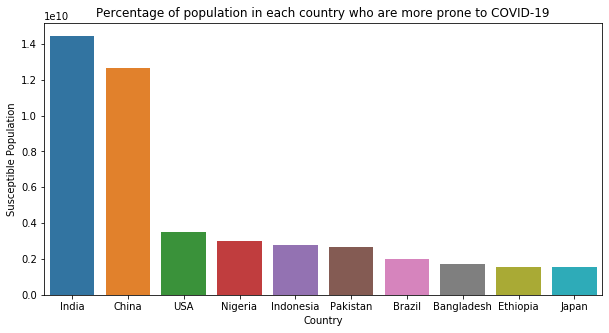

In [24]:
population = pd.DataFrame(df.groupby('Country',as_index=False)['Susceptible Population'].sum()).sort_values(by='Susceptible Population',ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Country',y='Susceptible Population',data=population[:10])
plt.title("Percentage of population in each country who are more prone to COVID-19")

    India has more population prone to COVID-19 and followed by China.

In [25]:
df['True Death Rate'] = ((df['Total Deaths']/df['Total Cases'])*100).round(2)

In [26]:
df['Per Capita Infection Rate'] = ((df['Total Cases']/df['Population'])*100).round(2)

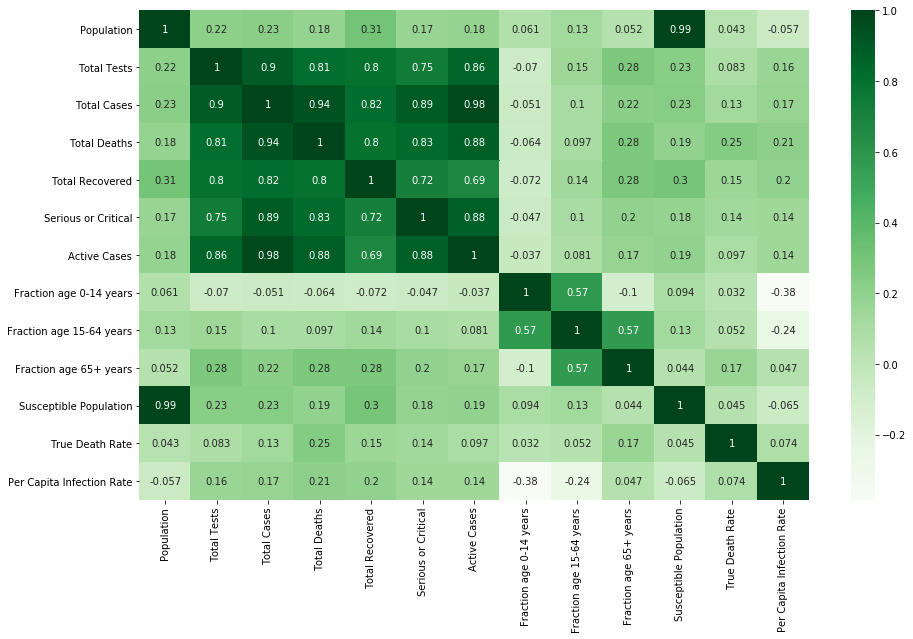

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [28]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Susceptible Population,True Death Rate,Per Capita Infection Rate
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,113455709,5.28,0.22
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,113455709,5.31,0.23
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,113455709,5.36,0.24
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,113455709,5.54,0.25
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,113455709,5.62,0.26


In [29]:
df = df[[c for c in df if c not in ['Population','Susceptible Population',
                                    'Per Capita Infection Rate','Total Tests','Total Cases',
                                    'Active Cases','Total Recovered','Total Deaths','Serious or Critical','True Death Rate']] 
        + ['Population','Susceptible Population','Per Capita Infection Rate','Total Tests','Total Cases','Active Cases',
           'Total Recovered','Total Deaths','Serious or Critical','True Death Rate']]

In [30]:
df.head()

,Date,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Population,Susceptible Population,Per Capita Infection Rate,Total Tests,Total Cases,Active Cases,Total Recovered,Total Deaths,Serious or Critical,True Death Rate
0,2020-04-18,USA,0.189,0.657,0.154,330774664,113455709,0.22,3722145.0,738792.0,631509.0,68269.0,39014.0,13551.0,5.28
1,2020-04-19,USA,0.189,0.657,0.154,330774664,113455709,0.23,3861549.0,763832.0,652276.0,71003.0,40553.0,13566.0,5.31
2,2020-04-20,USA,0.189,0.657,0.154,330774664,113455709,0.24,4026360.0,792759.0,677856.0,72389.0,42514.0,13951.0,5.36
3,2020-04-21,USA,0.189,0.657,0.154,330774664,113455709,0.25,4187392.0,818744.0,690503.0,82923.0,45318.0,14016.0,5.54
4,2020-04-22,USA,0.189,0.657,0.154,330774664,113455709,0.26,4325342.0,848717.0,717008.0,84050.0,47659.0,14016.0,5.62


Text(0.5, 1.0, 'Confirmed Vs Recovered Cases')

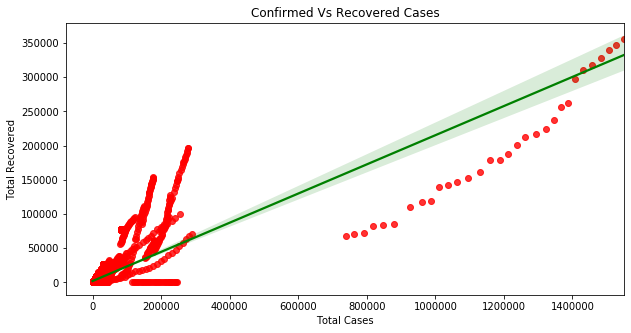

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(df['Total Cases'],df['Total Recovered'],scatter_kws={"color": "Red"}, line_kws={"color": "Green"})
plt.title('Confirmed Vs Recovered Cases')

In [32]:
#Maximum confirmed cases
confirmed = pd.DataFrame(df.groupby('Country',as_index=False)['Total Cases'].sum()).sort_values(by='Total Cases',ascending=False)
confirmed

,Country,Total Cases
201,USA,36196503.0
180,Spain,7547975.0
98,Italy,6416833.0
200,UK,5723955.0
69,France,5239029.0
...,...,...
37,Caribbean Netherlands,171.0
44,Comoros,148.0
5,Anguilla,93.0
165,Saint Pierre Miquelon,31.0


Text(0.5, 1.0, 'Total number of cases in each Country')

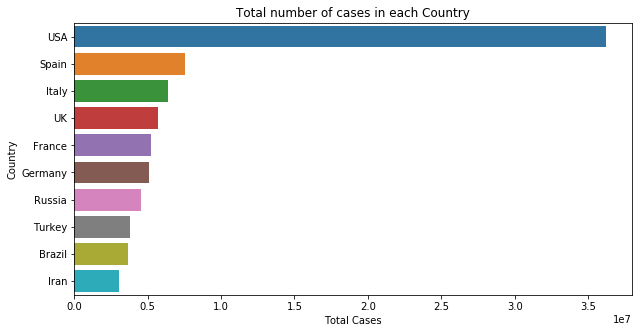

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Cases',y='Country',data=confirmed[:10])
plt.title("Total number of cases in each Country")

In [34]:
#Maximum Death cases
deaths = pd.DataFrame(df.groupby('Country',as_index=False)['Total Deaths'].sum()).sort_values(by='Total Deaths',ascending=False)
deaths

,Country,Total Deaths
201,USA,2102393.0
98,Italy,881699.0
200,UK,825478.0
180,Spain,767305.0
69,France,761760.0
...,...,...
66,Falkland Islands,0.0
67,Fiji,0.0
71,French Polynesia,0.0
150,Papua New Guinea,0.0


Text(0.5, 1.0, 'Total Number of Deaths in each Country')

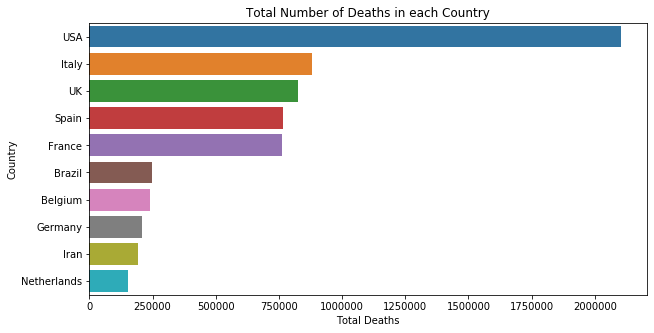

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total Deaths',y='Country',data=deaths[:10])
plt.title("Total Number of Deaths in each Country")

In [36]:
df.columns

Index(['Date', 'Country', 'Fraction age 0-14 years',
       'Fraction age 15-64 years', 'Fraction age 65+ years', 'Population',
       'Susceptible Population', 'Per Capita Infection Rate', 'Total Tests',
       'Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths',
       'Serious or Critical', 'True Death Rate'],
      dtype='object')

Text(0.5, 1.0, 'Cases Status')

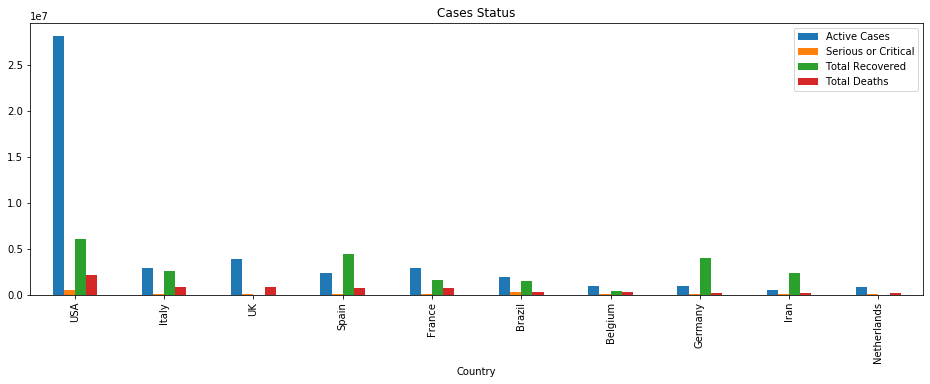

In [37]:
#Status in each country
status = pd.DataFrame(df.groupby('Country',as_index=False)['Active Cases','Serious or Critical','Total Recovered','Total Deaths'].sum()).sort_values(by='Total Deaths',ascending=False)
plt.rcParams["figure.figsize"] = [16,5]
status[:10].plot(x='Country',kind='bar')
plt.title("Cases Status")

In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6554 entries, 0 to 6602
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6554 non-null   datetime64[ns]
 1   Country                    6554 non-null   object        
 2   Fraction age 0-14 years    6554 non-null   float64       
 3   Fraction age 15-64 years   6554 non-null   float64       
 4   Fraction age 65+ years     6554 non-null   float64       
 5   Population                 6554 non-null   int64         
 6   Susceptible Population     6554 non-null   int32         
 7   Per Capita Infection Rate  6554 non-null   float64       
 8   Total Tests                6554 non-null   float64       
 9   Total Cases                6554 non-null   float64       
 10  Active Cases               6554 non-null   float64       
 11  Total Recovered            6554 non-null   float64       
 12  Total 

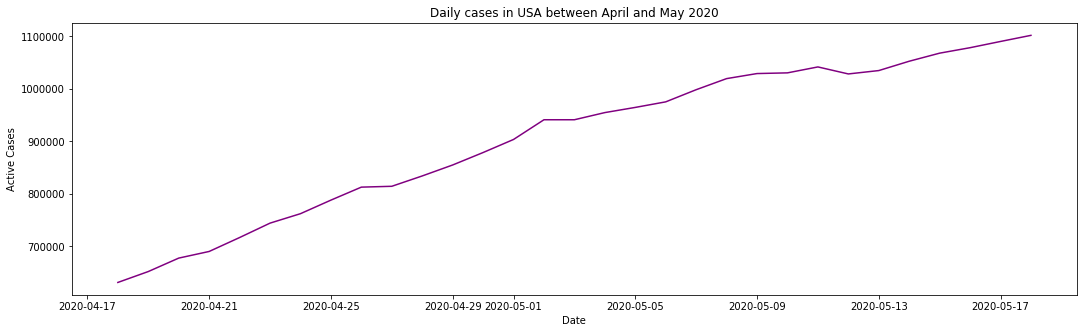

In [50]:
USA = df[df['Country'] == 'USA']


# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(USA['Date'],
        USA['Active Cases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Daily cases in USA between April and May 2020")

plt.show()

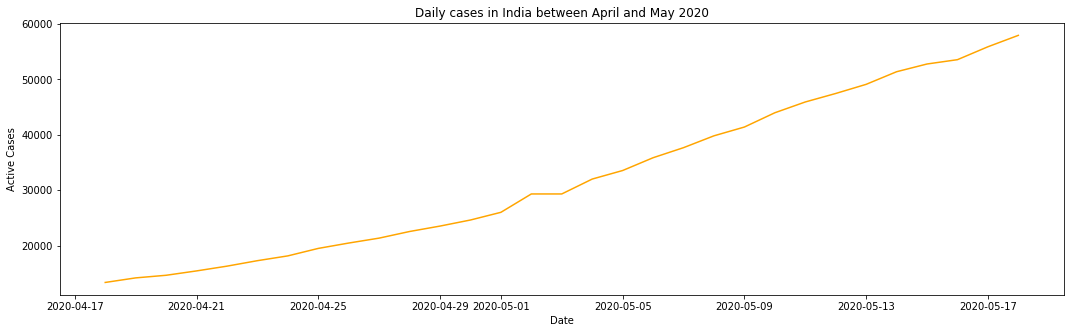

In [51]:
india = df[df['Country'] == 'India']


# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(india['Date'],
        india['Active Cases'],
        color='Orange')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Daily cases in India between April and May 2020")

plt.show()

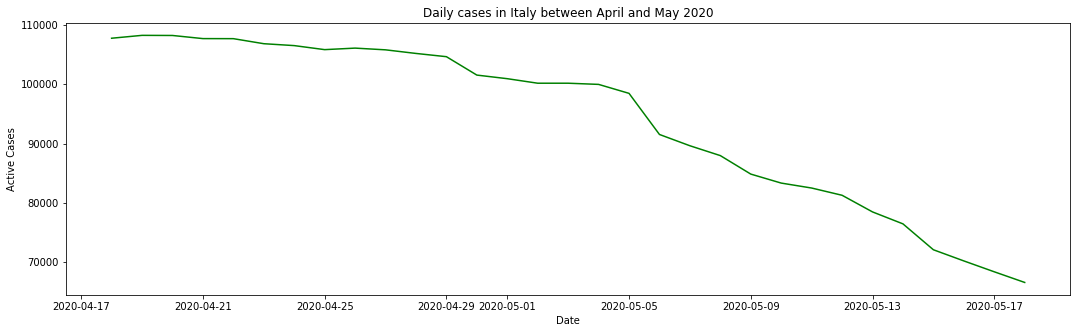

In [52]:
italy = df[df['Country'] == 'Italy']


# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(italy['Date'],
        italy['Active Cases'],
        color='Green')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Daily cases in Italy between April and May 2020")

plt.show()

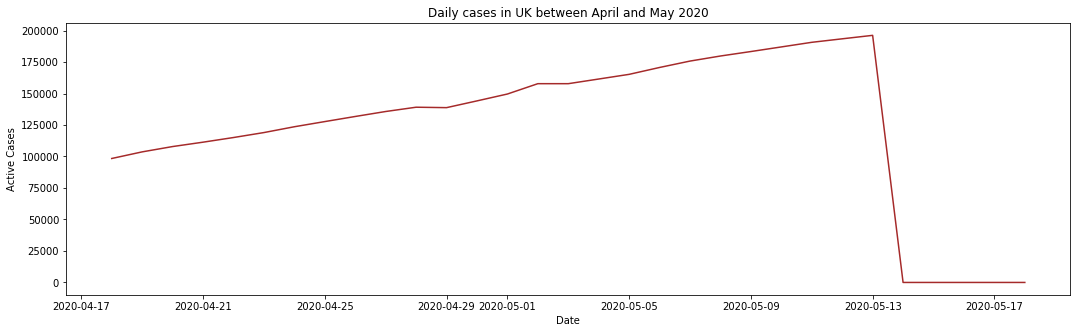

In [53]:
uk = df[df['Country'] == 'UK']


# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(uk['Date'],
        uk['Active Cases'],
        color='Brown')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Daily cases in UK between April and May 2020")

plt.show()

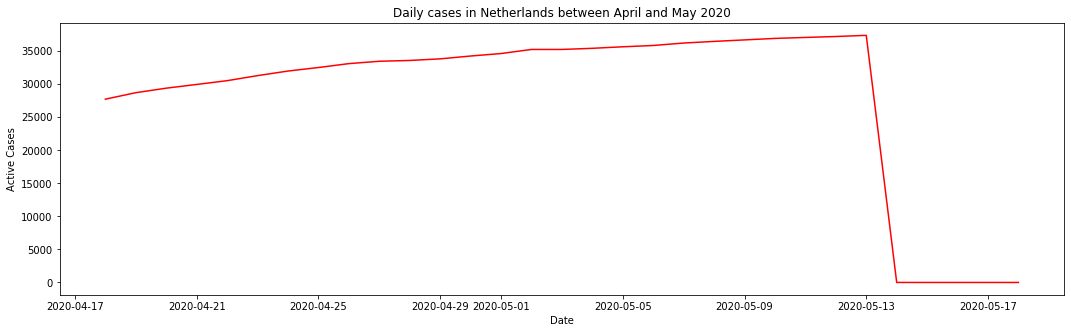

In [54]:
netherlands = df[df['Country'] == 'Netherlands']


# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(netherlands['Date'],
        netherlands['Active Cases'],
        color='Red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Active Cases",
       title="Daily cases in Netherlands between April and May 2020")

plt.show()

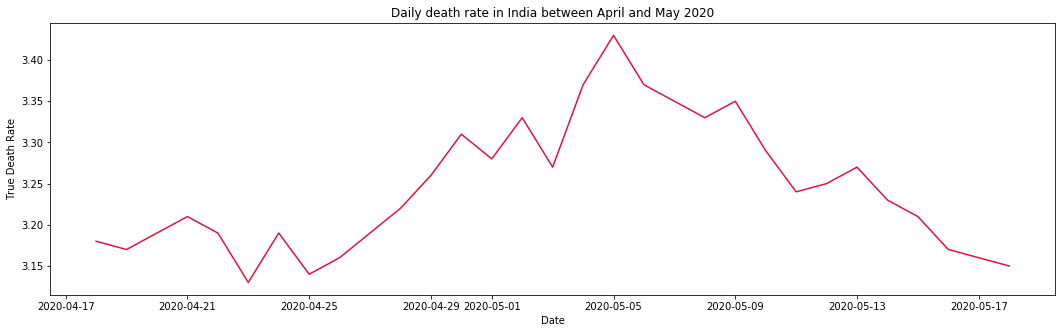

In [55]:
india = df[df['Country'] == 'India']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 5))

# Add x-axis and y-axis
ax.plot(india['Date'],
        india['True Death Rate'],
        color='Crimson')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="True Death Rate",
       title="Daily death rate in India between April and May 2020")

plt.show()